In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df['target'].value_counts() 

1    165
0    138
Name: target, dtype: int64

# test train split

In [6]:
x = df.drop('target', axis=1)
y = df['target']  # target column

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=9, stratify=y)


# Model training

In [7]:
model = LogisticRegression()

In [8]:
model.fit(x_train, y_train)

LogisticRegression()

In [9]:
model.fit(x_train, y_train)

LogisticRegression()

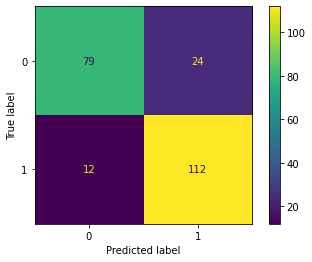

In [10]:
# Training Data
plot_confusion_matrix(model, x_train, y_train)

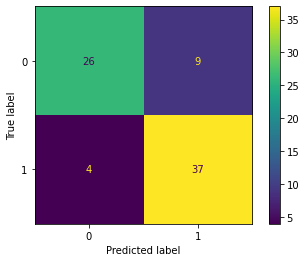

In [11]:
# Training Data
plot_confusion_matrix(model, x_test, y_test)

In [12]:
# Training Accuracy
model.score(x_train, y_train)

0.8414096916299559

In [13]:
# Testing Accuracy
model.score(x_test, y_test)

0.8289473684210527

## Model Evaluation

In [14]:
# prediction
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [15]:
# prediction probability
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[0.98995418, 0.01004582],
       [0.53087275, 0.46912725],
       [0.11327232, 0.88672768],
       [0.34861971, 0.65138029],
       [0.99455472, 0.00544528],
       [0.99384476, 0.00615524],
       [0.21451111, 0.78548889],
       [0.12368256, 0.87631744],
       [0.07744952, 0.92255048],
       [0.99636355, 0.00363645],
       [0.04517522, 0.95482478],
       [0.1732192 , 0.8267808 ],
       [0.95235532, 0.04764468],
       [0.93575087, 0.06424913],
       [0.20138501, 0.79861499],
       [0.16180681, 0.83819319],
       [0.4345997 , 0.5654003 ],
       [0.18974791, 0.81025209],
       [0.23215978, 0.76784022],
       [0.16224747, 0.83775253],
       [0.22380765, 0.77619235],
       [0.99643238, 0.00356762],
       [0.03422565, 0.96577435],
       [0.10076673, 0.89923327],
       [0.75194095, 0.24805905],
       [0.97628859, 0.02371141],
       [0.91004169, 0.08995831],
       [0.0379149 , 0.9620851 ],
       [0.44637095, 0.55362905],
       [0.03891738, 0.96108262],
       [0.

In [16]:
# Testing data
cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)

print("*"*45)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[26  9]
 [ 4 37]]
*********************************************
Accuracy Score: 0.8289473684210527
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.74      0.80        35
           1       0.80      0.90      0.85        41

    accuracy                           0.83        76
   macro avg       0.84      0.82      0.83        76
weighted avg       0.83      0.83      0.83        76



In [17]:
# Training data

# prediction
y_pred_train = model.predict(x_train)

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)

# Visualization

print("*"*45)
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[ 79  24]
 [ 12 112]]
*********************************************
Accuracy Score: 0.8414096916299559
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.87      0.77      0.81       103
           1       0.82      0.90      0.86       124

    accuracy                           0.84       227
   macro avg       0.85      0.84      0.84       227
weighted avg       0.84      0.84      0.84       227



In [18]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

In [19]:
columns=x.columns.tolist()
columns 

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [20]:
dict1= {"columns ":columns }

In [21]:
dict1

{'columns ': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']}

In [22]:
import json
with open("columns_dict.json",'w') as f:
    json.dump(dict1,f)

In [23]:
# for i in x.columns.tolist():
#     print(f"""<label>{i}:</label>
#         <input type="text" name = "{i}">
#         </select>""")